## Importing data

In [119]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [120]:
filepath = "50_Startups.csv"


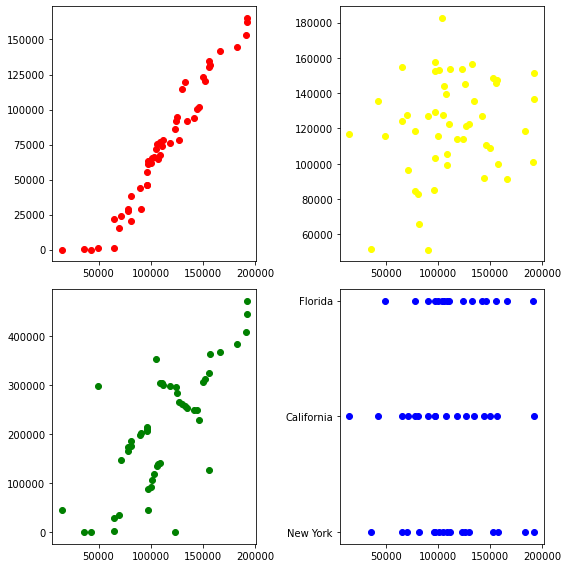

In [121]:
df = pd.read_csv(filepath)

df

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.figsize = (10, 10)
ax[0, 0].scatter(df['Profit'], df['R&D Spend'],color = 'red')
ax[0, 1].scatter(df['Profit'], df['Administration'],color = 'yellow')
ax[1, 0].scatter(df['Profit'], df['Marketing Spend'], color ='green')
ax[1, 1].scatter(df['Profit'], df['State'],color = 'blue')

plt.tight_layout()

In [122]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [123]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [125]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.15,random_state=42)


In [126]:
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [127]:
#initial cost
CostFunction(Xtrain,Ytrain,np.zeros(Xtrain.shape[1]),0)


7481398532.8751335

In [128]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        #print(cost)
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [140]:

w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.001,epochs=50000)
#39966915.01000263 is lowest cost achieved

Cost is: 7463551670.600676
Cost is: 47911779.41721468
Cost is: 39673721.4264486
Cost is: 38877930.12411327
Cost is: 38798110.69666638
Cost is: 38790104.451228075
Cost is: 38789301.38900168
Cost is: 38789220.838268586
Cost is: 38789212.75866978
Cost is: 38789211.94824988


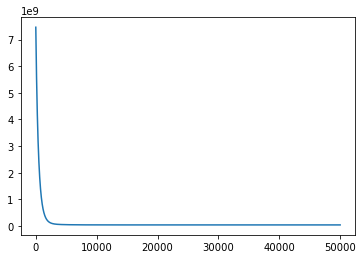

In [141]:
plt.plot(c)

In [131]:
CostFunction(Xtrain,Ytrain,w,b)

50702453.66109989

In [132]:
def predict(X, w, b):
    return X.dot(w) + b

In [133]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [134]:
y_pred = predict(Xtest, w, b)


In [135]:
r2 = r2score(y_pred, Ytest)
print(r2)

0.9063611411556549


In [136]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, Ytrain)

LinearRegression()

In [137]:
y_pred_sci = regressor.predict(Xtest)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), Ytest.reshape(len(Ytest),1)),1))
regressor.score(Xtrain, Ytrain)

0.9529408492659965

In [138]:
r3 = r2score(y_pred_sci, Ytest)
print(r3)

0.9012849312109729
